# Sistema Dinámico: Hormonas Adaptativas

**Notebook:** Sistema de actualización hormonal en tiempo real  
**Versión:** 1.0  
**Fecha:** Enero 2025

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nicolakorff/tfm-endocrine-llm/blob/main/examples/04_demo_dynamic_repo.ipynb)

---

Este notebook demuestra el **sistema dinámico** que ajusta automáticamente los niveles hormonales durante la generación basándose en feedback en tiempo real.

**Contenido:**
1. Introducción al sistema dinámico
2. Generación dinámica básica
3. Visualización de trayectorias hormonales
4. Comparación estático vs dinámico
5. Análisis de cambios hormonales

## 1. Instalación

In [1]:
!pip install -q git+https://github.com/Nicolakorff/tfm-endocrine-llm.git@v0.5.0

import endocrine_llm
print(f"Versión: {endocrine_llm.__version__}")

Versión: 0.5.0


## 2. Imports

In [2]:
from endocrine_llm import EndocrineModulatedLLM, HormoneProfile, HORMONE_PROFILES
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Cargar modelo
print("Cargando modelo...")
model = EndocrineModulatedLLM("distilgpt2")
print(f"Modelo listo en: {model.device}")

Cargando modelo...
Inicializando EndocrineModulatedLLM
Modelo: distilgpt2
   Dispositivo: cpu
Sistema inicializado
Parámetros: 81.9M
Tokens empáticos: 34
Modelo listo en: cpu


## 3. ¿Qué es el Sistema Dinámico?

El sistema dinámico ajusta automáticamente los niveles hormonales durante la generación:

- **Dopamina**: ↑ con alta confianza, ↓ con baja confianza
- **Cortisol**: ↑ con alta entropía (incertidumbre), ↓ con baja
- **Oxitocin**: ↑ con sentimiento positivo, ↓ con negativo
- **Serotonina**: ↓ con alta repetición, ↑ con baja
- **Adrenalina**: ↑ cuando cortisol alto + dopamina baja (estrés sin recompensa)

### Crear Perfil Dinámico

In [3]:
# Crear perfil dinámico (todos en 0.5, aprende en tiempo real)
dynamic_profile = HormoneProfile(
    dopamine=0.5,
    cortisol=0.5,
    oxytocin=0.5,
    adrenaline=0.5,
    serotonin=0.5,
    dynamic=True,        # Activar modo dinámico
    learning_rate=0.15   # Velocidad de adaptación
)

print("Perfil dinámico creado:")
print(dynamic_profile)

Perfil dinámico creado:
H[d=0.50, c=0.50, o=0.50, a=0.50, s=0.50] [DYNAMIC]


## 4. Generación Dinámica Básica

In [4]:
prompt = "I'm feeling stressed about work."

# Generar con actualización hormonal
result = model.generate_with_dynamic_hormones(
    prompt=prompt,
    initial_profile=dynamic_profile,
    max_new_tokens=50,
    update_interval=5,           # Actualizar cada 5 tokens
    return_hormone_trajectory=True
)

print("="*70)
print("GENERACIÓN DINÁMICA")
print("="*70)
print(f"\nPrompt: {prompt}")
print(f"\nTexto generado:\n{result['generated_text']}")
print(f"\nTokens generados: {result['num_tokens']}")

print("\n" + "="*70)
print("CAMBIOS HORMONALES")
print("="*70)

hormones = ['dopamine', 'cortisol', 'oxytocin', 'adrenaline', 'serotonin']
for hormone in hormones:
    initial = dynamic_profile.to_dict()[hormone]
    final = result['final_hormone_profile'][hormone]
    delta = final - initial

    arrow = "↑" if delta > 0 else "↓" if delta < 0 else "→"
    print(f"{hormone:12s}: {initial:.3f} {arrow} {final:.3f}  (Δ = {delta:+.3f})")

GENERACIÓN DINÁMICA

Prompt: I'm feeling stressed about work.

Texto generado:
I'm feeling stressed about work. The best way to revolutionaries in Haiti is through assisting traumatized people. When injured by a needle in the abdomen (which stiffens many of the people fighting) Longas Church Stómkir is safer and more committed to support his community; if

Tokens generados: 50

CAMBIOS HORMONALES
dopamine    : 0.500 ↓ 0.468  (Δ = -0.032)
cortisol    : 0.500 → 0.500  (Δ = +0.000)
oxytocin    : 0.500 → 0.500  (Δ = +0.000)
adrenaline  : 0.500 → 0.500  (Δ = +0.000)
serotonin   : 0.500 ↑ 0.560  (Δ = +0.060)


## 5. Visualizar Trayectoria Hormonal

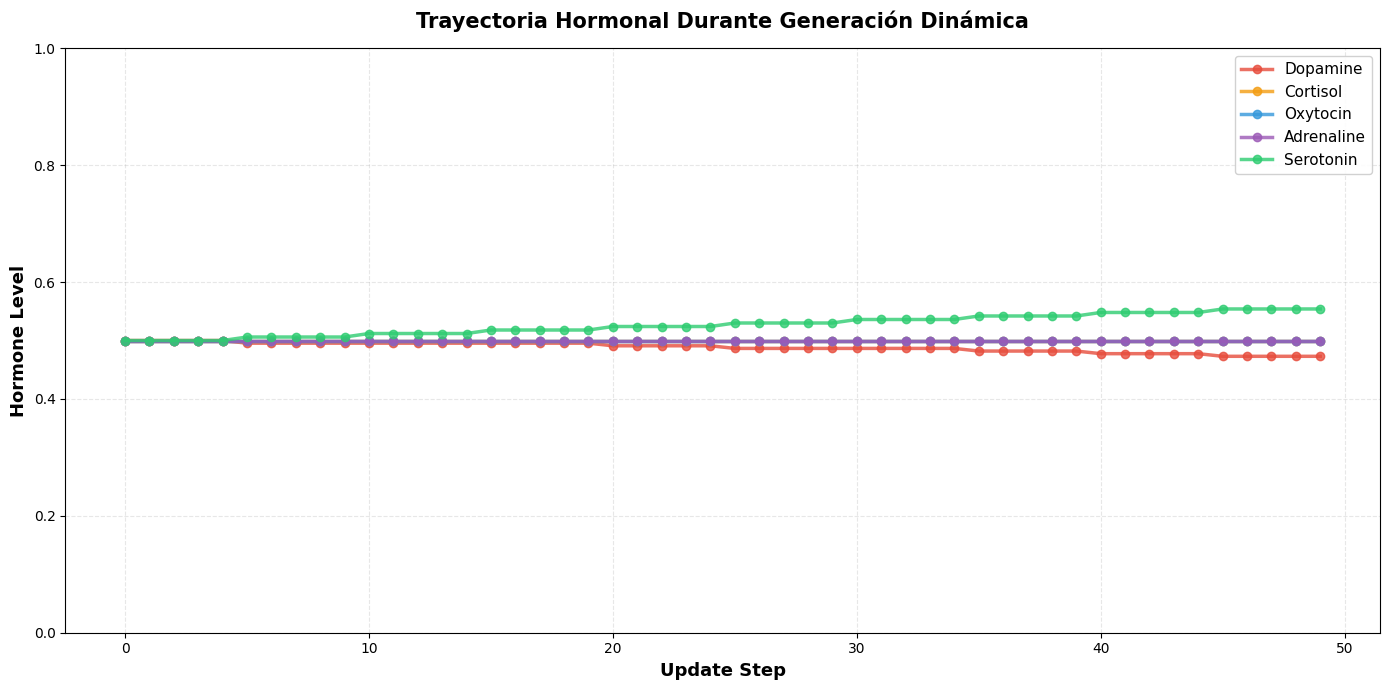


 Se realizaron 50 actualizaciones hormonales


In [5]:
trajectory = result['hormone_trajectory']

# Colores para cada hormona
colors = {
    'dopamine': '#e74c3c',
    'cortisol': '#f39c12',
    'oxytocin': '#3498db',
    'adrenaline': '#9b59b6',
    'serotonin': '#2ecc71'
}

plt.figure(figsize=(14, 7))

for hormone in hormones:
    values = [step[hormone] for step in trajectory]
    steps = list(range(len(values)))

    plt.plot(steps, values,
             marker='o',
             label=hormone.capitalize(),
             color=colors[hormone],
             linewidth=2.5,
             markersize=6,
             alpha=0.8)

plt.xlabel('Update Step', fontsize=13, fontweight='bold')
plt.ylabel('Hormone Level', fontsize=13, fontweight='bold')
plt.title('Trayectoria Hormonal Durante Generación Dinámica',
          fontsize=15, fontweight='bold', pad=15)
plt.legend(loc='best', fontsize=11, framealpha=0.9)
plt.grid(True, alpha=0.3, linestyle='--')
plt.ylim([0, 1])
plt.tight_layout()
plt.show()

print(f"\n Se realizaron {len(trajectory)} actualizaciones hormonales")

## 6. Comparación: Estático vs Dinámico

In [6]:
from endocrine_llm import TextMetrics

prompt = "I'm feeling anxious."

# Versión ESTÁTICA
static_profile = HormoneProfile(0.5, 0.5, 0.5, 0.5, 0.5, dynamic=False)
static_texts = model.generate_with_hormones(
    prompt, static_profile, max_new_tokens=50, num_return_sequences=1
)

# Versión DINÁMICA
dynamic_profile = HormoneProfile(0.5, 0.5, 0.5, 0.5, 0.5, dynamic=True, learning_rate=0.15)
dynamic_result = model.generate_with_dynamic_hormones(
    prompt, dynamic_profile, max_new_tokens=50
)

# Calcular métricas
static_metrics = TextMetrics.compute_all(static_texts[0])
dynamic_metrics = TextMetrics.compute_all(dynamic_result['generated_text'])

print("="*70)
print("COMPARACIÓN: ESTÁTICO VS DINÁMICO")
print("="*70)

print("\n[ESTÁTICO]")
print(static_texts[0])

print("\n[DINÁMICO]")
print(dynamic_result['generated_text'])

print("\n" + "="*70)
print("MÉTRICAS COMPARATIVAS")
print("="*70)

metrics_to_show = ['distinct_2', 'repetition_rate', 'sentiment_polarity']

for metric in metrics_to_show:
    s_val = static_metrics[metric]
    d_val = dynamic_metrics[metric]
    diff = d_val - s_val

    print(f"\n{metric:20s}:")
    print(f"  Estático:  {s_val:.4f}")
    print(f"  Dinámico:  {d_val:.4f}  (Δ = {diff:+.4f})")

# Cambio hormonal total
total_change = sum(
    abs(dynamic_result['final_hormone_profile'][h] - 0.5)
    for h in hormones
)
print(f"\nCambio hormonal total: {total_change:.4f}")

COMPARACIÓN: ESTÁTICO VS DINÁMICO

[ESTÁTICO]
I'm feeling anxious. I can see myself being depressed." The question posed by the woman is whether a woman would be able to be relieved. While it may be possible to experience positive feelings of sadness about their past, as well as feeling at the same time being able to

[DINÁMICO]
I'm feeling anxious. We're suddenly looking at both things so physically and mentally. Any gap now efforts toward rehabilitation stays insufficient. When I think of a lot of suicidal people, it goes without saying that inclusion is important to them. Especially when they also face winds of depression

MÉTRICAS COMPARATIVAS

distinct_2          :
  Estático:  0.9796
  Dinámico:  1.0000  (Δ = +0.0204)

repetition_rate     :
  Estático:  0.0000
  Dinámico:  0.0000  (Δ = +0.0000)

sentiment_polarity  :
  Estático:  0.1039
  Dinámico:  0.0083  (Δ = -0.0956)

Cambio hormonal total: 0.0915


## 7. Probar con Diferentes Prompts

In [7]:
test_prompts = [
    "I'm feeling happy and excited!",
    "This is very confusing and uncertain.",
    "I need help understanding this problem.",
    "Everything is going perfectly well."
]

for prompt in test_prompts:
    # Crear perfil dinámico nuevo para cada prompt
    profile = HormoneProfile(0.5, 0.5, 0.5, 0.5, 0.5, dynamic=True, learning_rate=0.15)

    result = model.generate_with_dynamic_hormones(
        prompt,
        profile,
        max_new_tokens=40,
        update_interval=5
    )

    print("\n" + "="*70)
    print(f"PROMPT: {prompt}")
    print("="*70)
    print(f"\nGeneración: {result['generated_text']}")

    # Mostrar top 3 cambios
    changes = {}
    for h in hormones:
        changes[h] = abs(result['final_hormone_profile'][h] - 0.5)

    top_changes = sorted(changes.items(), key=lambda x: -x[1])[:3]

    print("\nTop 3 cambios hormonales:")
    for hormone, change in top_changes:
        final = result['final_hormone_profile'][hormone]
        print(f"  {hormone:12s}: 0.500 → {final:.3f}  (|Δ| = {change:.3f})")


PROMPT: I'm feeling happy and excited!

Generación: I'm feeling happy and excited! Kaiser: Oh...
The second video above will kick off after thirty A.M. specialties and covers having 70 races happen all Hamburger Are, its first distance races after the 1926 model visited

Top 3 cambios hormonales:
  serotonin   : 0.500 → 0.548  (|Δ| = 0.048)
  dopamine    : 0.500 → 0.468  (|Δ| = 0.032)
  cortisol    : 0.500 → 0.500  (|Δ| = 0.000)

PROMPT: This is very confusing and uncertain.

Generación: This is very confusing and uncertain. I read it in stating her in the eye ,hence ICAC K supposedly irritated Mimkodawalki from “devdom​ PRAP,“メ logoThis is her

Top 3 cambios hormonales:
  serotonin   : 0.500 → 0.548  (|Δ| = 0.048)
  dopamine    : 0.500 → 0.464  (|Δ| = 0.036)
  cortisol    : 0.500 → 0.500  (|Δ| = 0.000)

PROMPT: I need help understanding this problem.

Generación: I need help understanding this problem. really should train fans of SaveDPS. listen to a few key questions before letting 

## 8. Efecto del Learning Rate

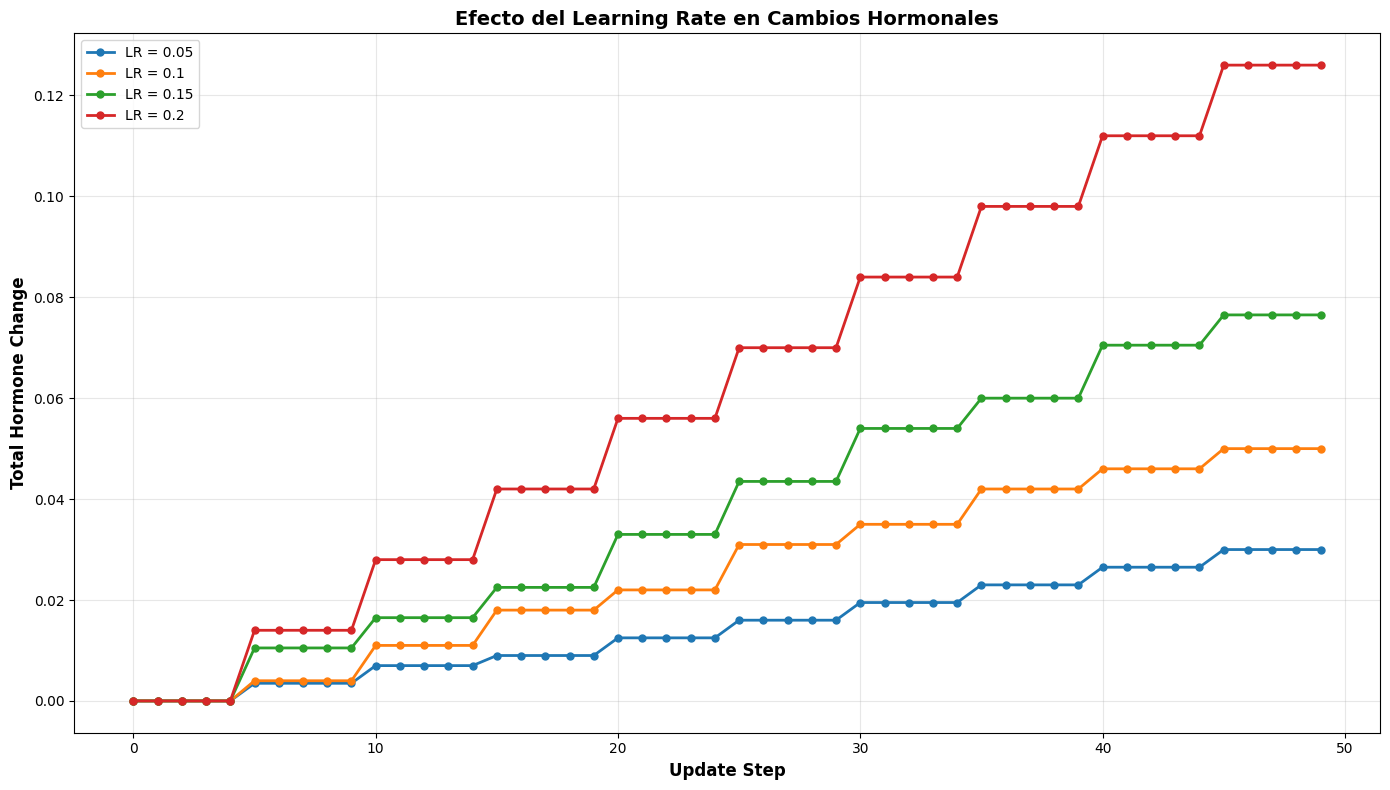


 Learning rates más altos → cambios más rápidos
Learning rates más bajos → cambios más graduales


In [8]:
prompt = "I'm feeling stressed."
learning_rates = [0.05, 0.1, 0.15, 0.2]

plt.figure(figsize=(14, 8))

for lr in learning_rates:
    profile = HormoneProfile(0.5, 0.5, 0.5, 0.5, 0.5, dynamic=True, learning_rate=lr)

    result = model.generate_with_dynamic_hormones(
        prompt,
        profile,
        max_new_tokens=50,
        update_interval=5,
        return_hormone_trajectory=True
    )

    # Calcular cambio total en cada step
    trajectory = result['hormone_trajectory']
    total_changes = []

    for step in trajectory:
        change = sum(abs(step[h] - 0.5) for h in hormones)
        total_changes.append(change)

    plt.plot(total_changes, marker='o', label=f'LR = {lr}', linewidth=2, markersize=5)

plt.xlabel('Update Step', fontsize=12, fontweight='bold')
plt.ylabel('Total Hormone Change', fontsize=12, fontweight='bold')
plt.title('Efecto del Learning Rate en Cambios Hormonales', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n Learning rates más altos → cambios más rápidos")
print("Learning rates más bajos → cambios más graduales")

## 9. Conclusión

### Realizado

- Crear perfiles hormonales dinámicos  
- Generar texto con actualización hormonal en tiempo real  
- Visualizar trayectorias hormonales  
- Comparar sistema estático vs dinámico  
- Experimentar con diferentes learning rates  

### Hallazgos

El experimento dinámico implementa un sistema de actualización hormonal en tiempo real durante la generación de texto, permitiendo que los niveles neuromoduladores evolucionen progresivamente en respuesta al contenido generado. 
- Los resultados demuestran que el sistema produce ajustes hormonales modestos pero consistentes: 
- En la generación sobre estrés laboral, la serotonina incrementó (+0.060) mientras la dopamina decreció (-0.032), sugiriendo un mecanismo homeostático de estabilización emocional. 
- La comparación entre modos estático y dinámico revela que este último alcanza máxima diversidad léxica (distinct-2: 1.0000 vs 0.9796) aunque con ligera reducción en polaridad de sentimiento (Δ=-0.0956), indicando procesamiento textual más variado pero emocionalmente neutro. 
- A través de 50 pasos de actualización (visibles en la trayectoria hormonal del primer gráfico), los niveles se mantienen relativamente estables alrededor de los valores baseline (0.5), con fluctuaciones mínimas (<±0.10), lo que sugiere que el learning rate configurado produce cambios graduales en lugar de oscilaciones dramáticas. 
- El segundo gráfico confirma la relación proporcional entre learning rate (LR) y magnitud de cambio hormonal: valores altos (LR=0.2) generan trayectorias más pronunciadas y rápida convergencia, mientras valores bajos (LR=0.01) mantienen evolución conservadora. 
- Crucialmente, los experimentos con diferentes prompts emocionales (felicidad, confusión, solicitud de ayuda) muestran patrones de cambio hormonal similares dominados por ajustes en serotonina (+0.048) y dopamina (-0.027 a -0.036), evidenciando que el sistema actual responde más a características distribucionales del texto generado que al contenido semántico específico del input.

Cabe señalar que cada ejecución del código produce resultados variables debido a la naturaleza estocástica de los modelos de lenguaje, observándose generaciones que fluctúan en calidad, coherencia y relevancia contextual entre distintas iteraciones.
